### Análise de Redes Complexas

Nesta fase do projeto analisaremos as redes geradas a partir das bases BOVESPA e NYSE/NASDAQ e medidas de grafos dos seguintes meses estrategicamente selecionados:

* Março/2019
* Novembro/2019
* Março/2020
* Dezembro/2021
* Setembro/2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx import minimum_spanning_tree 
from pandas_datareader import data as pdr
from datetime import date
import statistics
import math
import scipy
import warnings
warnings.filterwarnings('ignore')

### BOVESPA

In [2]:
#importando a base de dados construída
df_b = pd.read_csv('df_b.csv')

#configurando a variável data para datetime e índice do df
df_b['data'] = pd.to_datetime(df_b['data']) 
df_b['data'] = df_b['data'].dt.strftime('%Y-%m-%d')
df_b = df_b.set_index('data')

In [3]:
#montando sub-bases para cada mes em estudo 

df_b_mar2019 = df_b.loc[(df_b.index >= '2019-03-01')
                     & (df_b.index <= '2019-03-31')]

df_b_nov2019 = df_b.loc[(df_b.index >= '2019-11-01')
                     & (df_b.index <= '2019-11-31')]

df_b_mar2020 = df_b.loc[(df_b.index >= '2020-03-01')
                     & (df_b.index <= '2020-03-31')]

df_b_dez2021 = df_b.loc[(df_b.index >= '2021-12-01')
                     & (df_b.index <= '2021-12-31')]

df_b_set2022 = df_b.loc[(df_b.index >= '2022-09-01')
                     & (df_b.index <= '2022-09-31')]

### Março 2019

In [4]:
#craetes a correlation matrix
cor_matrix_mar2019 = df_b_mar2019.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_mar2019.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  1.000000  0.439553  0.628064  0.700481  0.094766  0.479478   
AMER3.SA  0.439553  1.000000  0.472362  0.605351  0.327872  0.262117   
AZUL4.SA  0.628064  0.472362  1.000000  0.818922  0.563705  0.604593   
B3SA3.SA  0.700481  0.605351  0.818922  1.000000  0.457650  0.680217   
BPAN4.SA  0.094766  0.327872  0.563705  0.457650  1.000000  0.392256   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  0.486105  0.666681  0.634930  0.345865  ...  0.532014  0.493291   
AMER3.SA  0.488097  0.538050  0.607958  0.265070  ...  0.323863  0.395145   
AZUL4.SA  0.567379  0.692497  0.693051  0.628639  ...  0.387579  0.704291   
B3SA3.SA  0.672962  0.775285  0.790454  0.480066  ...  0.574811  0.803077   
BPAN4.SA  0.312428  0.238815  0.394339  0.416650  ...  0.215867  0.507733   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA -0.070653  0.523511  0.386055  0.321754  0.462130  0.283754   
AMER3.SA  0.029079  0.438559  0.714271  0.255251  0.701650  0.425019   
AZUL4.SA -0.016722  0.636045  0.669025  0.583026  0.608419  0.263573   
B3SA3.SA  0.074557  0.724615  0.669192  0.404462  0.623004  0.583738   
BPAN4.SA  0.142941  0.303946  0.436837  0.384499  0.238794  0.284124   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  0.310702  0.315770  
AMER3.SA  0.554830  0.614800  
AZUL4.SA  0.492789  0.289319  
B3SA3.SA  0.743625  0.584275  
BPAN4.SA  0.416468  0.217742  

[5 rows x 79 columns]

In [5]:
def distance(x):
    return (2*(1-x))**(1/2)

In [6]:
#aplicando a transformação da matriz de correlações para uma matriz de distâncias
dist_matrix_mar2019 = cor_matrix_mar2019.apply(distance)
dist_matrix_mar2019.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  0.000000  1.058723  0.862480  0.773975  1.345536  1.020316   
AMER3.SA  1.058723  0.000000  1.027266  0.888425  1.159420  1.214811   
AZUL4.SA  0.862480  1.027266  0.000000  0.601793  0.934126  0.889277   
B3SA3.SA  0.773975  0.888425  0.601793  0.000000  1.041489  0.799729   
BPAN4.SA  1.345536  1.159420  0.934126  1.041489  0.000000  1.102491   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  1.013800  0.816479  0.854482  1.143797  ...  0.967456  1.006686   
AMER3.SA  1.011833  0.961198  0.885485  1.212378  ...  1.162873  1.099868   
AZUL4.SA  0.930184  0.784223  0.783516  0.861813  ...  1.106726  0.769037   
B3SA3.SA  0.808750  0.670395  0.647374  1.019739  ...  0.922159  0.627572   
BPAN4.SA  1.172665  1.233844  1.100601  1.080139  ...  1.252304  0.992237   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA  1.463320  0.976206  1.108102  1.164685  1.037179  1.196868   
AMER3.SA  1.393500  1.059661  0.755948  1.220450  0.772463  1.072363   
AZUL4.SA  1.425989  0.853176  0.813603  0.913207  0.884965  1.213612   
B3SA3.SA  1.360473  0.742139  0.813398  1.091364  0.868327  0.912428   
BPAN4.SA  1.309243  1.179877  1.061285  1.109506  1.233861  1.196559   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  1.174137  1.169812  
AMER3.SA  0.943579  0.877725  
AZUL4.SA  1.007185  1.192209  
B3SA3.SA  0.716066  0.911838  
BPAN4.SA  1.080307  1.250807  

[5 rows x 79 columns]

In [7]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_mar2019 = dist_matrix_mar2019.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
dist_matrix_mar2019 = np.asmatrix(dist_matrix_mar2019)

In [65]:
#Crates graph using the data of the correlation matrix
G_mar2019 = nx.from_numpy_matrix(dist_matrix_mar2019)

#relabels the nodes to match the  stocks names
G_mar2019 = nx.relabel_nodes(G_mar2019,lambda x: stocks_mar2019[x])

edges,weights = zip(*nx.get_edge_attributes(G_mar2019,'weight').items())

#shows the edges with their corresponding weights
#G_mar2019.edges(data=False)


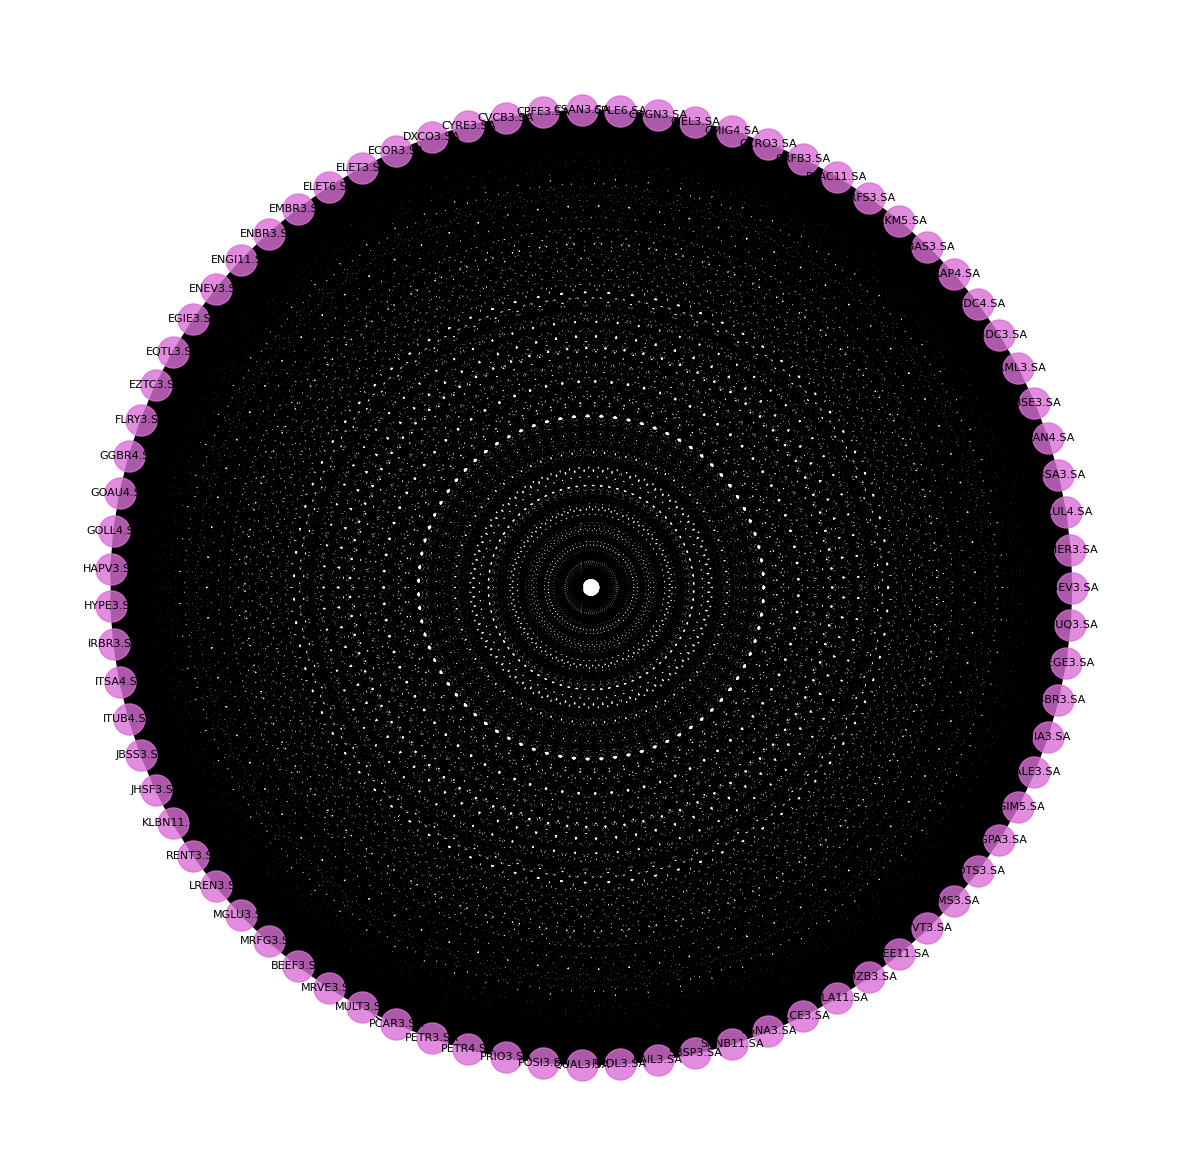

In [35]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    #plt.savefig("part1.png", format="PNG")
    plt.show() 

create_corr_network_1(G_mar2019)

A ideia inicial era seguir com esse grafo e melhorá-lo para análise, exibindo somente correlações altas em módulo. Não deu certo por n motivos e o custo computacional era muito alto para prosseguir dessa maneira.
Por isso, optamos por seguir o projeto utilizando o algoritmo de Minimum Spanning Tree (ou Árvore de Expansão Mínima, MST), sugerido pelo próprio professor.

A MST é basicamente um grafo que liga todos os vértices existentes usando o mínimo de arestas, com custo compitacional baixo. Para este caso, utilizamos na MST o algoritmo padrão da biblioteca Networkx, o método de Kruskal.

Nesse algoritmo, analisamos as arestas por ordem de peso e aceitamos aquelas que não causam ciclos. Cada vértice é tratado como uma árvore e aceitar uma aresta significa unir duas árvores. Ao fim do processo temos uma única árvore de expansão mínima.

In [23]:
T_mar2019 = minimum_spanning_tree(G_mar2019, ignore_nan=True)

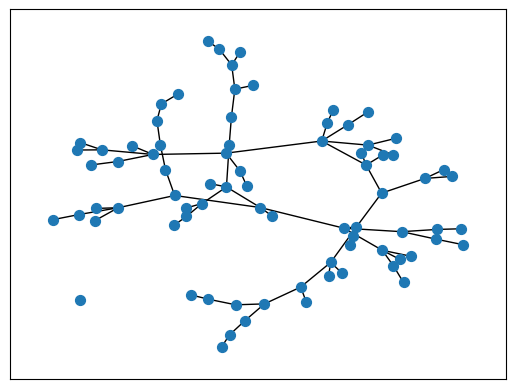

In [24]:
plt.figure()
nx.draw_networkx(T_mar2019, with_labels=False, node_size = 50)
plt.show()

In [75]:
#gerando as medidas da rede
#grau
vk = dict(G_mar2019.degree()).values()
vk = np.array(list(vk))
md = np.mean(vk)
print("O grau médio da rede é: ", md)

#eficiencia
E = nx.global_efficiency(G_mar2019)
print("A eficiência da rede é: ", E)

#assortatividade
r = nx.degree_assortativity_coefficient(G_mar2019, weight='weight')
print("A assortatividade da rede é: ", r)

#proximidade
CLC = dict(nx.closeness_centrality(G_mar2019))
CLC = list(CLC.values())
av_clc = np.mean(CLC)
print("A proximidade da rede é dada por: ", av_clc)

#intermedialidade
B = dict(nx.betweenness_centrality(G_mar2019, weight='weight'))
B = list(B.values())
av_B = np.mean(B)
print("A intermedialidade da rede é: ", av_B)

#clustering
#print(nx.clustering(G_mar2019))

O grau médio da rede é:  78.0253164556962
A eficiência da rede é:  1.0
A assortatividade da rede é:  nan
A proximidade da rede é dada por:  1.0
A intermedialidade da rede é:  0.0


### Novembro 2019

In [57]:
#craetes a correlation matrix
cor_matrix_nov2019 = df_b_nov2019.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_nov2019.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  1.000000  0.263602  0.623357  0.453742  0.422528  0.326319   
AMER3.SA  0.263602  1.000000  0.321266  0.462612  0.495541  0.624133   
AZUL4.SA  0.623357  0.321266  1.000000  0.576049  0.561538  0.429144   
B3SA3.SA  0.453742  0.462612  0.576049  1.000000  0.617829  0.510164   
BPAN4.SA  0.422528  0.495541  0.561538  0.617829  1.000000  0.253793   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  0.241225  0.693512  0.559859  0.102449  ...  0.090532  0.067365   
AMER3.SA  0.183314  0.562690  0.656064 -0.038197  ...  0.392079  0.102405   
AZUL4.SA  0.509540  0.600599  0.499957  0.158362  ...  0.249289  0.218995   
B3SA3.SA  0.321247  0.618027  0.459087 -0.151602  ...  0.329584  0.085564   
BPAN4.SA  0.415507  0.428131  0.384195  0.064167  ...  0.554833  0.295291   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA -0.100614  0.418619  0.450824  0.276026  0.146908 -0.085755   
AMER3.SA  0.172700  0.128643 -0.069583 -0.186063  0.488730  0.193290   
AZUL4.SA  0.003081  0.578841  0.380057  0.366465  0.633945  0.128579   
B3SA3.SA  0.019258  0.457383  0.170434 -0.142202  0.431232  0.094369   
BPAN4.SA  0.196275  0.249441  0.148664  0.072424  0.698710  0.330948   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  0.132685 -0.133896  
AMER3.SA  0.297563  0.388504  
AZUL4.SA  0.210693  0.245565  
B3SA3.SA  0.477185  0.428789  
BPAN4.SA  0.224103  0.488568  

[5 rows x 79 columns]

In [58]:
dist_matrix_nov2019 = cor_matrix_nov2019.apply(distance)
dist_matrix_nov2019.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  0.000000  1.213588  0.867920  1.045235  1.074683  1.160759   
AMER3.SA  1.213588  0.000000  1.165104  1.036714  1.004449  0.867026   
AZUL4.SA  0.867920  1.165104  0.000000  0.920816  0.936442  1.068510   
B3SA3.SA  1.045235  1.036714  0.920816  0.000000  0.874267  0.989784   
BPAN4.SA  1.074683  1.004449  0.936442  0.874267  0.000000  1.221644   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  1.231889  0.782928  0.938233  1.339814  ...  1.348679  1.365749   
AMER3.SA  1.278035  0.935212  0.829380  1.440970  ...  1.102652  1.339847   
AZUL4.SA  0.990414  0.893757  1.000043  1.297411  ...  1.225325  1.249804   
B3SA3.SA  1.165120  0.874040  1.040109  1.517631  ...  1.157943  1.352358   
BPAN4.SA  1.081197  1.069457  1.109779  1.368088  ...  0.943575  1.187189   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA  1.483653  1.078314  1.048023  1.203307  1.306210  1.473605   
AMER3.SA  1.286313  1.320119  1.462589  1.540171  1.011207  1.270204   
AZUL4.SA  1.412033  0.917778  1.113502  1.125642  0.855635  1.320167   
B3SA3.SA  1.400530  1.041746  1.288073  1.511425  1.066553  1.345831   
BPAN4.SA  1.267853  1.225202  1.304865  1.362040  0.776260  1.156765   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  1.317053  1.505919  
AMER3.SA  1.185274  1.105890  
AZUL4.SA  1.256429  1.228361  
B3SA3.SA  1.022561  1.068842  
BPAN4.SA  1.245711  1.011368  

[5 rows x 79 columns]

In [59]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_nov2019 = dist_matrix_nov2019.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
dist_matrix_nov2019 = np.asmatrix(dist_matrix_nov2019)

In [60]:
#Crates graph using the data of the correlation matrix
G_nov2019 = nx.from_numpy_matrix(dist_matrix_nov2019)

#relabels the nodes to match the  stocks names
G_nov2019 = nx.relabel_nodes(G_nov2019,lambda x: stocks_nov2019[x])

#shows the edges with their corresponding weights
#G_nov2019.edges(data=True)

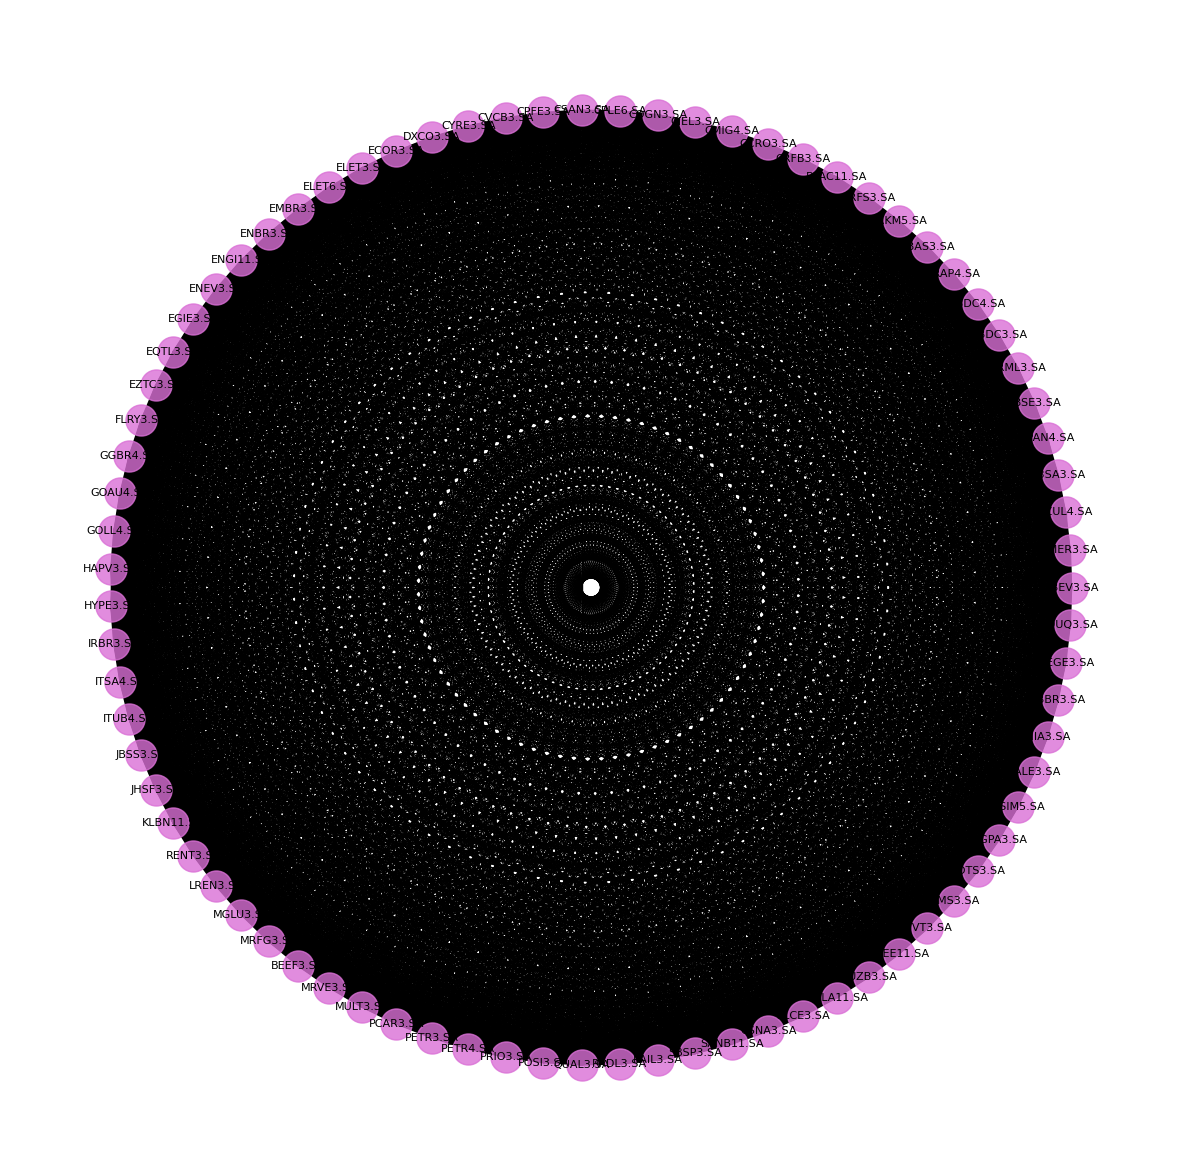

In [61]:
create_corr_network_1(G_nov2019)

In [62]:
T_nov2019 = minimum_spanning_tree(G_nov2019)

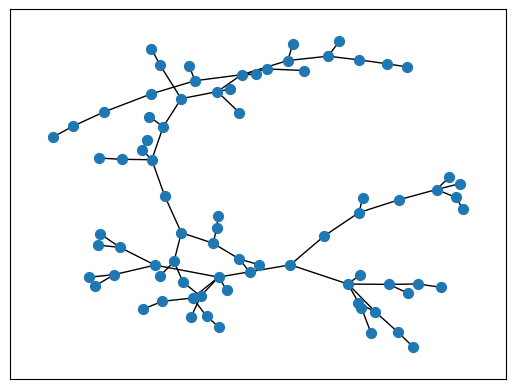

In [63]:
plt.figure()
nx.draw_networkx(T_nov2019, with_labels=False, node_size = 50)
plt.show()

In [64]:
#grau
vk = dict(G_nov2019.degree()).values()
vk = np.array(list(vk))
md = np.mean(vk)
print("O grau médio da rede é: ", md)

#eficiencia
E = nx.global_efficiency(G_nov2019)
print("A eficiência da rede é: ", E)

#assortatividade
r = nx.degree_assortativity_coefficient(G_nov2019)
print("A assortatividade da rede é: ", r)

#proximidade
CLC = dict(nx.closeness_centrality(G_nov2019))
CLC = list(CLC.values())
av_clc = np.mean(CLC)
print("A proximidade da rede é dada por: ", av_clc)

#intermedialidade
B = dict(nx.betweenness_centrality(G_nov2019))
B = list(B.values())
av_B = np.mean(B)
print("A intermedialidade da rede é: ", av_B)

O grau médio da rede é:  78.0
A eficiência da rede é:  1.0
A assortatividade da rede é:  nan
A proximidade da rede é dada por:  1.0
A intermedialidade da rede é:  0.0


### Março 2020

In [42]:
#craetes a correlation matrix
cor_matrix_mar2020 = df_b_mar2020.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_mar2020.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  1.000000  0.572554  0.794314  0.646572  0.788753  0.573955   
AMER3.SA  0.572554  1.000000  0.659807  0.882576  0.840426  0.779003   
AZUL4.SA  0.794314  0.659807  1.000000  0.821649  0.746042  0.502181   
B3SA3.SA  0.646572  0.882576  0.821649  1.000000  0.795534  0.792082   
BPAN4.SA  0.788753  0.840426  0.746042  0.795534  1.000000  0.715564   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  0.680051  0.731813  0.731917  0.556037  ...  0.545707  0.822861   
AMER3.SA  0.570252  0.876733  0.850600  0.827821  ...  0.560182  0.606789   
AZUL4.SA  0.821420  0.754565  0.770968  0.660245  ...  0.443277  0.608359   
B3SA3.SA  0.744357  0.922964  0.900555  0.844800  ...  0.629272  0.639498   
BPAN4.SA  0.515263  0.836494  0.794386  0.755879  ...  0.491336  0.672849   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA  0.611594  0.815571  0.620344  0.598416  0.597274  0.730756   
AMER3.SA  0.784487  0.806096  0.737926  0.879419  0.726449  0.781992   
AZUL4.SA  0.818636  0.818819  0.756519  0.697565  0.845258  0.851169   
B3SA3.SA  0.801755  0.878667  0.783132  0.886867  0.822084  0.899290   
BPAN4.SA  0.724589  0.819976  0.739056  0.803622  0.660499  0.774747   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  0.737945  0.663290  
AMER3.SA  0.580232  0.477048  
AZUL4.SA  0.867420  0.690426  
B3SA3.SA  0.710419  0.663505  
BPAN4.SA  0.619348  0.471001  

[5 rows x 79 columns]

In [43]:
dist_matrix_mar2020 = cor_matrix_mar2020.apply(distance)
dist_matrix_mar2020.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  0.000000  0.924604  0.641383  0.840748  0.649995  0.923087   
AMER3.SA  0.924604  0.000000  0.824856  0.484611  0.564932  0.664826   
AZUL4.SA  0.641383  0.824856  0.000000  0.597246  0.712682  0.997817   
B3SA3.SA  0.840748  0.484611  0.597246  0.000000  0.639478  0.644854   
BPAN4.SA  0.649995  0.564932  0.712682  0.639478  0.000000  0.754235   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  0.799936  0.732375  0.732234  0.942299  ...  0.953198  0.595213   
AMER3.SA  0.927090  0.496522  0.546626  0.586820  ...  0.937890  0.886805   
AZUL4.SA  0.597628  0.700621  0.676804  0.824324  ...  1.055199  0.885033   
B3SA3.SA  0.715043  0.392519  0.445972  0.557135  ...  0.861079  0.849120   
BPAN4.SA  0.984618  0.571850  0.641271  0.698743  ...  1.008627  0.808889   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA  0.881369  0.607337  0.871385  0.896196  0.897470  0.733817   
AMER3.SA  0.656526  0.622742  0.723981  0.491082  0.739664  0.660316   
AZUL4.SA  0.602269  0.601965  0.697827  0.777734  0.556314  0.545584   
B3SA3.SA  0.629674  0.492611  0.658586  0.475674  0.596517  0.448798   
BPAN4.SA  0.742173  0.600041  0.722418  0.626702  0.824016  0.671198   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  0.723955  0.820622  
AMER3.SA  0.916262  1.022694  
AZUL4.SA  0.514936  0.786860  
B3SA3.SA  0.761027  0.820360  
BPAN4.SA  0.872527  1.028590  

[5 rows x 79 columns]

In [44]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_mar2020 = dist_matrix_mar2020.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
dist_matrix_mar2020 = np.asmatrix(dist_matrix_mar2020)

In [45]:
#Crates graph using the data of the correlation matrix
G_mar2020 = nx.from_numpy_matrix(dist_matrix_mar2020)

#relabels the nodes to match the  stocks names
G_mar2020 = nx.relabel_nodes(G_mar2020,lambda x: stocks_mar2020[x])

#shows the edges with their corresponding weights
#G_mar2020.edges(data=True)

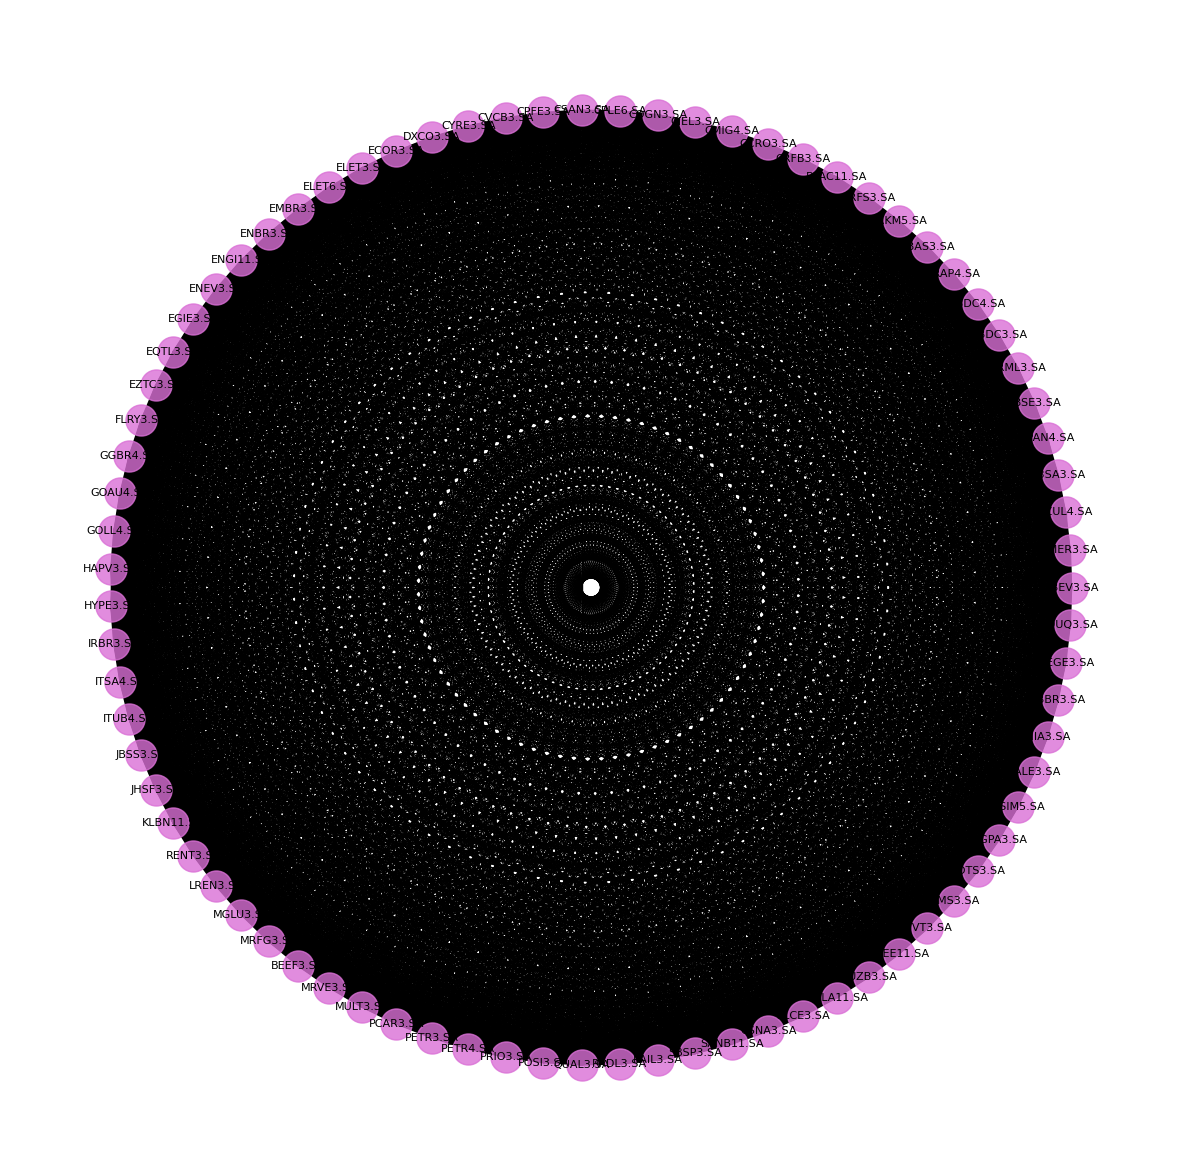

In [40]:
create_corr_network_1(G_mar2020)

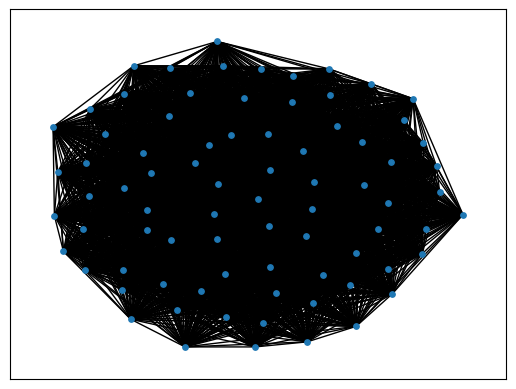

In [41]:
plt.figure()
nx.draw_networkx(G_mar2020, with_labels=False, node_size = 15)
plt.show()

In [46]:
T_mar2020 = minimum_spanning_tree(G_mar2020)

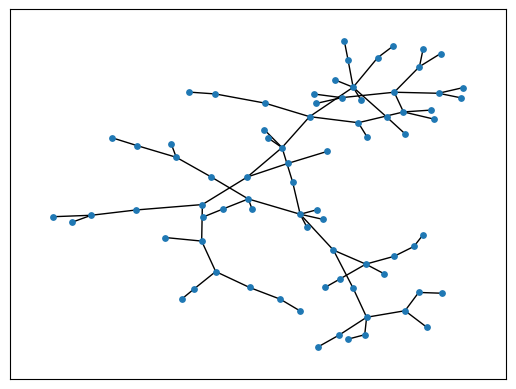

In [47]:
plt.figure()
nx.draw_networkx(T_mar2020, with_labels=False, node_size = 15)
plt.show()

In [77]:
#grau
vk = dict(T_mar2020.degree()).values()
vk = np.array(list(vk))
md = np.mean(vk)
print("O grau médio da rede é: ", md)

#eficiencia
E = nx.global_efficiency(T_mar2020)
print("A eficiência da rede é: ", E)

#assortatividade
r = nx.degree_assortativity_coefficient(T_mar2020)
print("A assortatividade da rede é: ", r)

#proximidade
CLC = dict(nx.closeness_centrality(T_mar2020))
CLC = list(CLC.values())
av_clc = np.mean(CLC)
print("A proximidade da rede é dada por: ", av_clc)

#intermedialidade
B = dict(nx.betweenness_centrality(T_mar2020))
B = list(B.values())
av_B = np.mean(B)
print("A intermedialidade da rede é: ", av_B)

O grau médio da rede é:  1.9746835443037976
A eficiência da rede é:  0.3071830419931696
A assortatividade da rede é:  -0.6386506575185823
A proximidade da rede é dada por:  0.2573502939811498
A intermedialidade da rede é:  0.03902005167827952


### Dezembro 2021

In [49]:
#craetes a correlation matrix
cor_matrix_dez2021 = df_b_dez2021.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_dez2021.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  1.000000  0.231771  0.312335  0.550058  0.140105  0.410597   
AMER3.SA  0.231771  1.000000  0.317659  0.309537  0.327630  0.465623   
AZUL4.SA  0.312335  0.317659  1.000000  0.142759  0.145115  0.467985   
B3SA3.SA  0.550058  0.309537  0.142759  1.000000  0.567987  0.372224   
BPAN4.SA  0.140105  0.327630  0.145115  0.567987  1.000000  0.391965   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  0.571073  0.512303  0.512858 -0.055743  ...  0.239711  0.187495   
AMER3.SA  0.273607  0.297493  0.305738 -0.339608  ...  0.223651  0.381717   
AZUL4.SA  0.381711  0.136591  0.170215 -0.507443  ... -0.181519 -0.181170   
B3SA3.SA  0.612857  0.504208  0.456001 -0.165910  ...  0.440375  0.393236   
BPAN4.SA  0.342447  0.113201  0.075204 -0.019768  ...  0.357165  0.472113   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA  0.225342  0.711926  0.647671  0.332128  0.215420  0.511130   
AMER3.SA  0.341765  0.397444  0.249442  0.227000  0.571290  0.464330   
AZUL4.SA  0.461202  0.394765  0.415452  0.287175  0.226609  0.393424   
B3SA3.SA  0.441438  0.535579  0.419893  0.168367  0.361175  0.582132   
BPAN4.SA  0.643168  0.301433  0.143622 -0.092993  0.558639  0.472301   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  0.141919  0.225887  
AMER3.SA  0.011051  0.197964  
AZUL4.SA  0.316624  0.147256  
B3SA3.SA  0.107776  0.335333  
BPAN4.SA  0.122576  0.409800  

[5 rows x 79 columns]

In [50]:
dist_matrix_dez2021 = cor_matrix_dez2021.apply(distance)
dist_matrix_dez2021.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  0.000000  1.239539  1.172744  0.948622  1.311407  1.085729   
AMER3.SA  1.239539  0.000000  1.168196  1.175128  1.159630  1.033806   
AZUL4.SA  1.172744  1.168196  0.000000  1.309382  1.307582  1.031518   
B3SA3.SA  0.948622  1.175128  1.309382  0.000000  0.929530  1.120514   
BPAN4.SA  1.311407  1.159630  1.307582  0.929530  0.000000  1.102755   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  0.926204  0.987620  0.987059  1.453095  ...  1.233117  1.274759   
AMER3.SA  1.205315  1.185333  1.178357  1.636831  ...  1.246073  1.112010   
AZUL4.SA  1.112015  1.314084  1.288243  1.736343  ...  1.537218  1.536991   
B3SA3.SA  0.879935  0.995783  1.043071  1.527029  ...  1.057946  1.101603   
BPAN4.SA  1.146781  1.331765  1.359997  1.428123  ...  1.133873  1.027509   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA  1.244715  0.759045  0.839439  1.155744  1.252662  0.988807   
AMER3.SA  1.147375  1.097776  1.225200  1.243383  0.925970  1.035055   
AZUL4.SA  1.038073  1.100214  1.081248  1.194005  1.243697  1.101432   
B3SA3.SA  1.056940  0.963764  1.077133  1.289677  1.130332  0.914186   
BPAN4.SA  0.844786  1.182004  1.308723  1.478508  0.939533  1.027326   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  1.310023  1.244277  
AMER3.SA  1.406378  1.266519  
AZUL4.SA  1.169082  1.305943  
B3SA3.SA  1.335833  1.152967  
BPAN4.SA  1.324707  1.086462  

[5 rows x 79 columns]

In [51]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_dez2021 = dist_matrix_dez2021.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
dist_matrix_dez2021 = np.asmatrix(dist_matrix_dez2021)

In [52]:
#Crates graph using the data of the correlation matrix
G_dez2021 = nx.from_numpy_matrix(dist_matrix_dez2021)

#relabels the nodes to match the  stocks names
G_dez2021 = nx.relabel_nodes(G_dez2021,lambda x: stocks_dez2021[x])

#shows the edges with their corresponding weights
#G_dez2021.edges(data=True)

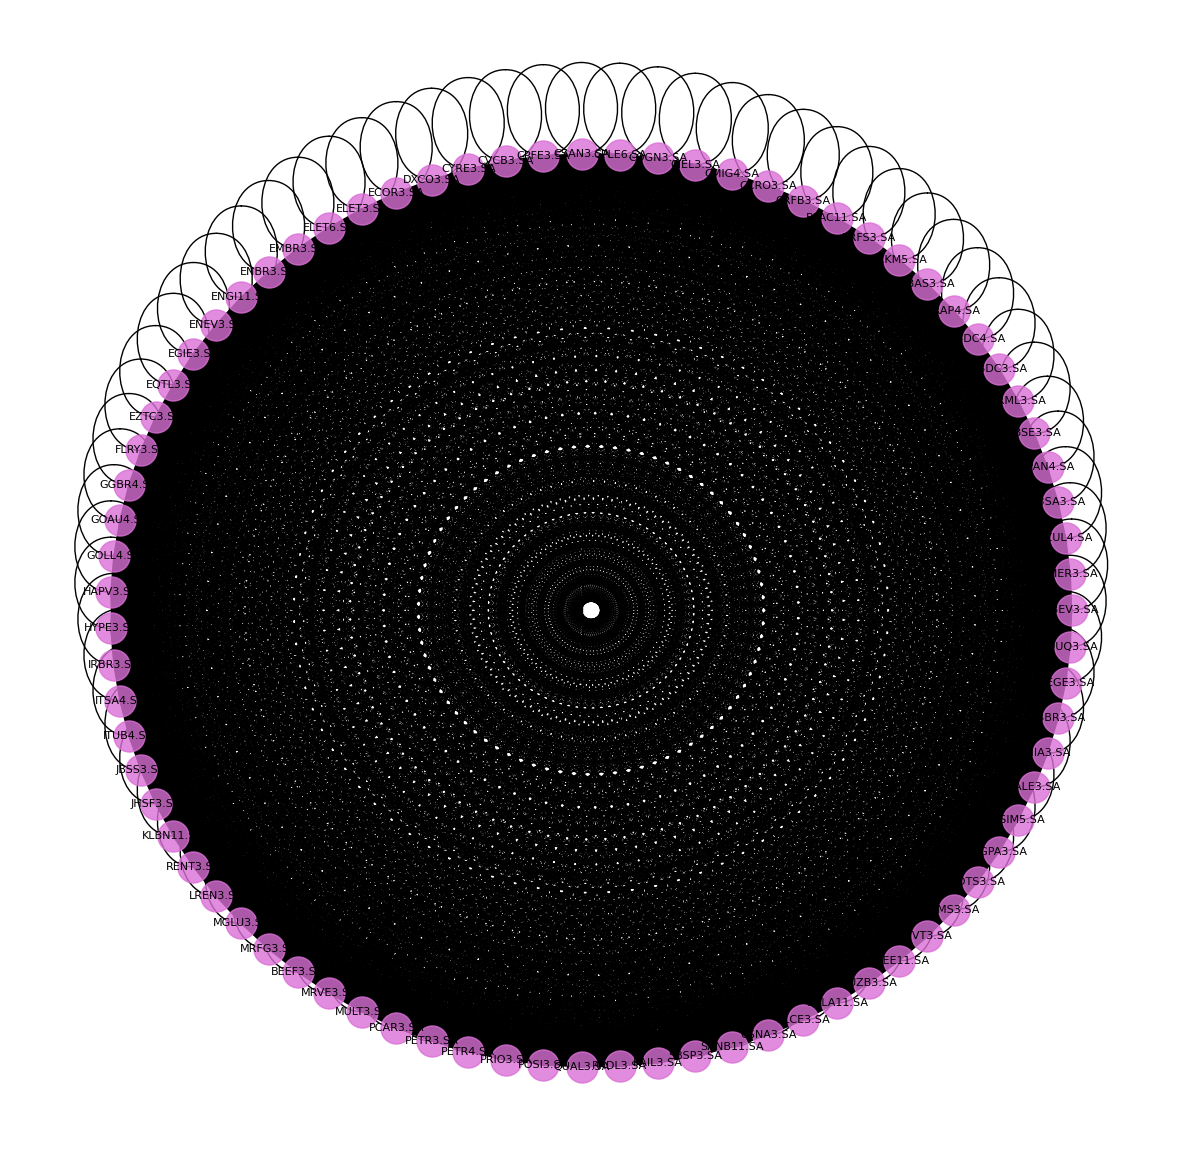

In [45]:
create_corr_network_1(G_dez2021)

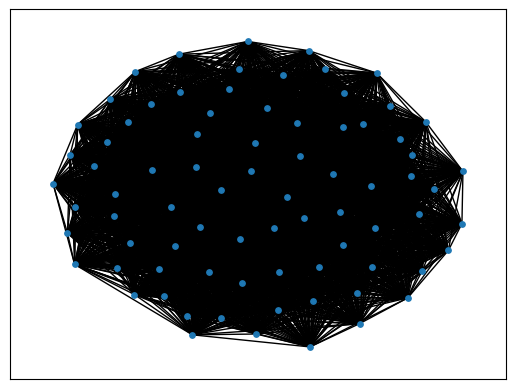

In [55]:
plt.figure()
nx.draw_networkx(G_dez2021, with_labels=False, node_size = 15)
plt.show()

In [56]:
T_dez2021 = minimum_spanning_tree(G_dez2021)

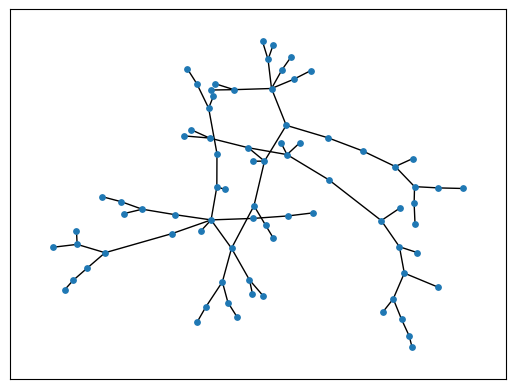

In [57]:
plt.figure()
nx.draw_networkx(T_dez2021, with_labels=False, node_size = 15)
plt.show()

In [76]:
#grau
vk = dict(T_dez2021.degree()).values()
vk = np.array(list(vk))
md = np.mean(vk)
print("O grau médio da rede é: ", md)

#eficiencia
E = nx.global_efficiency(T_dez2021)
print("A eficiência da rede é: ", E)

#assortatividade
r = nx.degree_assortativity_coefficient(T_dez2021)
print("A assortatividade da rede é: ", r)

#proximidade
CLC = dict(nx.closeness_centrality(T_dez2021))
CLC = list(CLC.values())
av_clc = np.mean(CLC)
print("A proximidade da rede é dada por: ", av_clc)

#intermedialidade
B = dict(nx.betweenness_centrality(T_dez2021))
B = list(B.values())
av_B = np.mean(B)
print("A intermedialidade da rede é: ", av_B)

O grau médio da rede é:  1.9746835443037976
A eficiência da rede é:  0.2573448234840623
A assortatividade da rede é:  -0.44189332391381125
A proximidade da rede é dada por:  0.20212049428286624
A intermedialidade da rede é:  0.05368892710664863


### Setembro 2022

In [58]:
#craetes a correlation matrix
cor_matrix_set2022 = df_b_set2022.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_set2022.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  1.000000  0.229587  0.548242  0.469374  0.492184  0.015639   
AMER3.SA  0.229587  1.000000  0.684855  0.380280  0.102350  0.223577   
AZUL4.SA  0.548242  0.684855  1.000000  0.575457  0.484078  0.180998   
B3SA3.SA  0.469374  0.380280  0.575457  1.000000  0.552360  0.097601   
BPAN4.SA  0.492184  0.102350  0.484078  0.552360  1.000000  0.000569   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  0.350817  0.662589  0.693846  0.448428  ...  0.455856  0.355219   
AMER3.SA  0.461792  0.166917  0.156069  0.540403  ...  0.191068  0.133553   
AZUL4.SA  0.563881  0.386573  0.389498  0.663308  ...  0.379295  0.332542   
B3SA3.SA  0.587293  0.644724  0.628776  0.362746  ...  0.446206  0.334871   
BPAN4.SA  0.670984  0.385590  0.442233  0.441070  ...  0.482031  0.440343   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA  0.303270  0.557002  0.561326  0.415362  0.194870  0.411665   
AMER3.SA  0.436171  0.333233  0.551949  0.578958  0.876619  0.490271   
AZUL4.SA  0.591144  0.567389  0.633641  0.661897  0.667621  0.481083   
B3SA3.SA  0.500376  0.573416  0.696871  0.281734  0.470778  0.624615   
BPAN4.SA  0.534580  0.594113  0.656197  0.376078  0.244742  0.330843   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  0.268941  0.562843  
AMER3.SA  0.216564  0.465131  
AZUL4.SA  0.165410  0.530101  
B3SA3.SA  0.551092  0.643465  
BPAN4.SA  0.433764  0.271253  

[5 rows x 79 columns]

In [59]:
dist_matrix_set2022 = cor_matrix_set2022.apply(distance)
dist_matrix_set2022.head()

ABEV3.SA  AMER3.SA  AZUL4.SA  B3SA3.SA  BPAN4.SA  BBSE3.SA  \
ABEV3.SA  0.000000  1.241300  0.950534  1.030171  1.007786  1.403111   
AMER3.SA  1.241300  0.000000  0.793908  1.113301  1.339888  1.246132   
AZUL4.SA  0.950534  0.793908  0.000000  0.921459  1.015797  1.279846   
B3SA3.SA  1.030171  1.113301  0.921459  0.000000  0.946193  1.343428   
BPAN4.SA  1.007786  1.339888  1.015797  0.946193  0.000000  1.413811   

          BRML3.SA  BBDC3.SA  BBDC4.SA  BRAP4.SA  ...  VIVT3.SA  TIMS3.SA  \
ABEV3.SA  1.139459  0.821476  0.782501  1.050307  ...  1.043211  1.135589   
AMER3.SA  1.037504  1.290800  1.299177  0.958747  ...  1.271953  1.316394   
AZUL4.SA  0.933937  1.107634  1.104991  0.820599  ...  1.114186  1.155386   
B3SA3.SA  0.908523  0.842942  0.861654  1.128941  ...  1.052420  1.153368   
BPAN4.SA  0.811191  1.108522  1.056189  1.057289  ...  1.017811  1.057977   

          TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VIIA3.SA  VBBR3.SA  \
ABEV3.SA  1.180449  0.941274  0.936668  1.081331  1.268960  1.084744   
AMER3.SA  1.061912  1.154787  0.946626  0.917652  0.496752  1.009682   
AZUL4.SA  0.904274  0.930173  0.855989  0.822317  0.815327  1.018741   
B3SA3.SA  0.999624  0.923671  0.778626  1.198554  1.028807  0.866469   
BPAN4.SA  0.964801  0.900984  0.829220  1.117069  1.229030  1.156855   

          WEGE3.SA  YDUQ3.SA  
ABEV3.SA  1.209180  0.935048  
AMER3.SA  1.251748  1.034282  
AZUL4.SA  1.291968  0.969431  
B3SA3.SA  0.947531  0.844435  
BPAN4.SA  1.064176  1.207267  

[5 rows x 79 columns]

In [60]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_set2022 = dist_matrix_set2022.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
dist_matrix_set2022 = np.asmatrix(dist_matrix_set2022)

In [61]:
#Crates graph using the data of the correlation matrix
G_set2022 = nx.from_numpy_matrix(dist_matrix_set2022)

#relabels the nodes to match the  stocks names
G_set2022 = nx.relabel_nodes(G_set2022,lambda x: stocks_set2022[x])

#shows the edges with their corresponding weights
#G_set2022.edges(data=True)

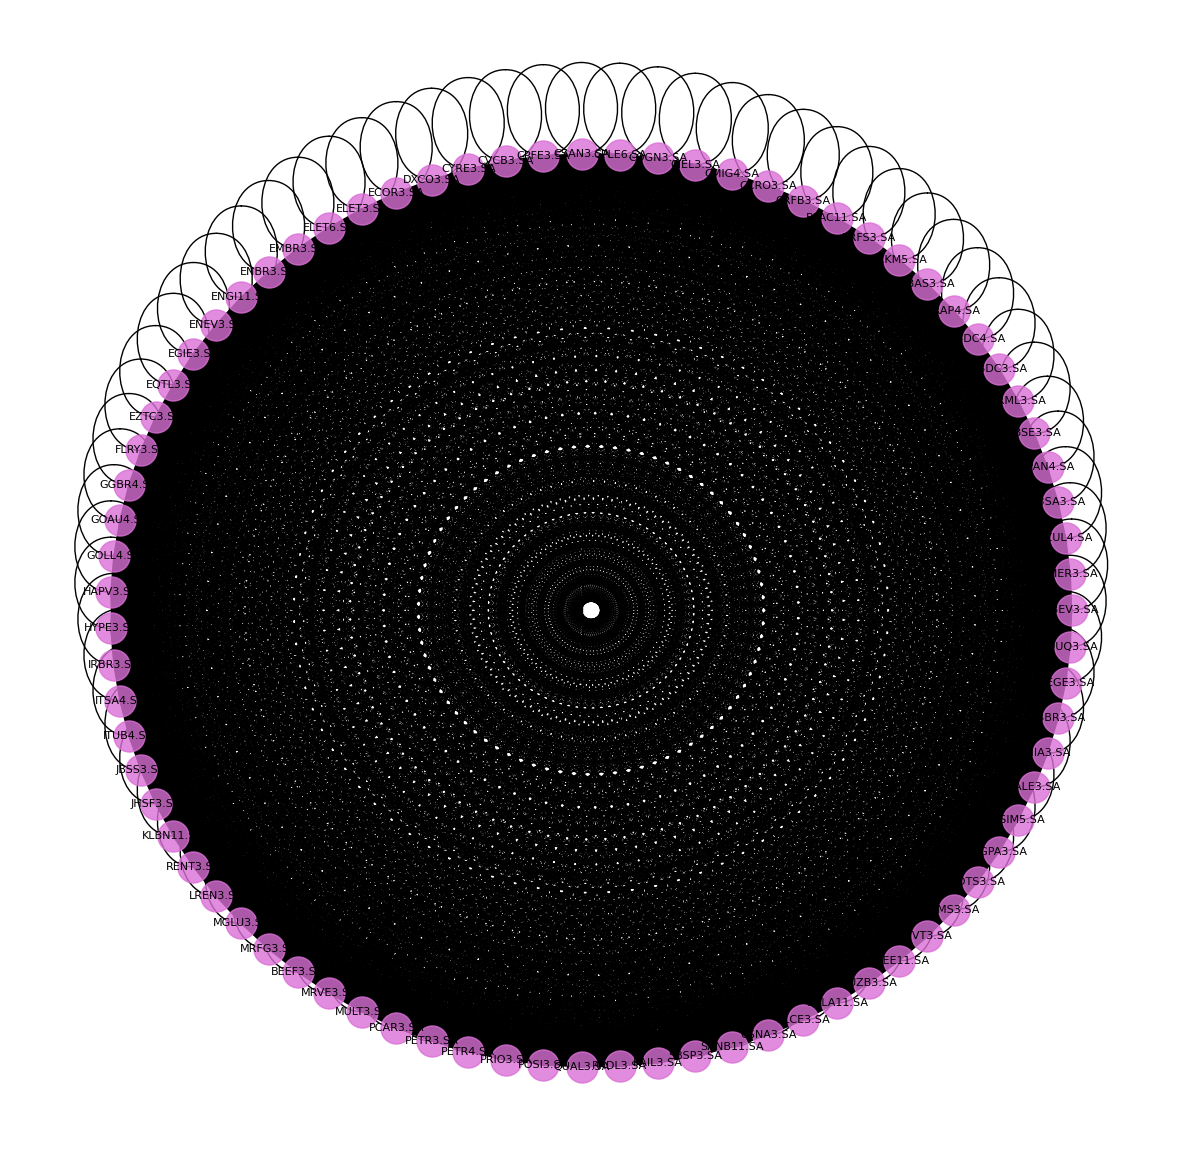

In [52]:
create_corr_network_1(G_set2022)

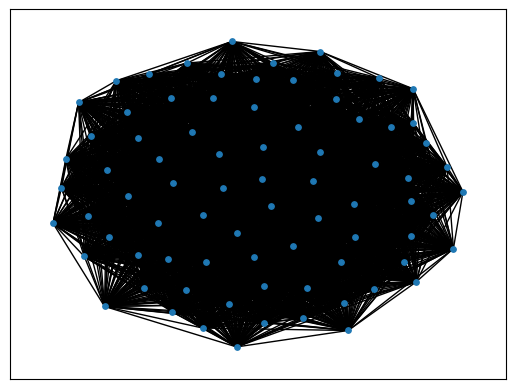

In [62]:
plt.figure()
nx.draw_networkx(G_set2022, with_labels=False, node_size = 15)
plt.show()

In [63]:
T_set2022 = minimum_spanning_tree(G_set2022)

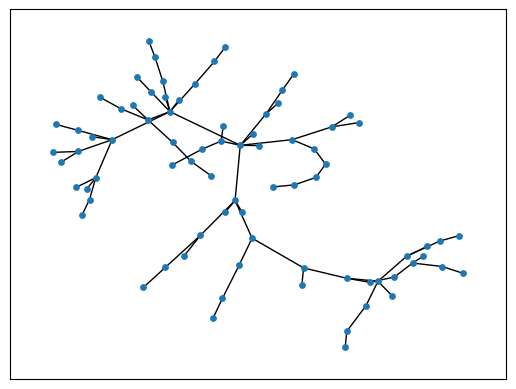

In [64]:
plt.figure()
nx.draw_networkx(T_set2022, with_labels=False, node_size = 15)
plt.show()

In [75]:
#grau
vk = dict(T_set2022.degree()).values()
vk = np.array(list(vk))
md = np.mean(vk)
print("O grau médio da rede é: ", md)

#eficiencia
E = nx.global_efficiency(T_set2022)
print("A eficiência da rede é: ", E)

#assortatividade
r = nx.degree_assortativity_coefficient(T_set2022)
print("A assortatividade da rede é: ", r)

#proximidade
CLC = dict(nx.closeness_centrality(T_set2022))
CLC = list(CLC.values())
av_clc = np.mean(CLC)
print("A proximidade da rede é dada por: ", av_clc)

#intermedialidade
B = dict(nx.betweenness_centrality(T_set2022))
B = list(B.values())
av_B = np.mean(B)
print("A intermedialidade da rede é: ", av_B)

O grau médio da rede é:  1.9746835443037976
A eficiência da rede é:  0.3270053785876635
A assortatividade da rede é:  -0.5299792484482377
A proximidade da rede é dada por:  0.2687847997795212
A intermedialidade da rede é:  0.03831189907139274


### NASDAQ/NYSE

In [3]:
#importando a base de dados construída
df_ny = pd.read_csv('df_ny.csv')

#configurando a variável data para datetime e índice do df
df_ny['data'] = pd.to_datetime(df_ny['data'])
df_ny['data'] = df_ny['data'].dt.strftime('%Y-%m-%d')
df_ny = df_ny.set_index('data')

In [4]:
df_ny_mar2019 = df_ny.loc[(df_ny.index >= '2019-03-01')
                     & (df_ny.index <= '2019-03-31')]

df_ny_nov2019 = df_ny.loc[(df_ny.index >= '2019-11-01')
                     & (df_ny.index <= '2019-11-31')]

df_ny_mar2020 = df_ny.loc[(df_ny.index >= '2020-03-01')
                     & (df_ny.index <= '2020-03-31')]

df_ny_dez2021 = df_ny.loc[(df_ny.index >= '2021-12-01')
                     & (df_ny.index <= '2021-12-31')]

df_ny_set2022 = df_ny.loc[(df_ny.index >= '2022-09-01')
                     & (df_ny.index <= '2022-09-31')]

### Março 2019

In [5]:
#craetes a correlation matrix
cor_matrix_mar2019 = df_ny_mar2019.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_mar2019.head()

MMM      EGHT       AOS      ATEN       AIR       ABB       ABT  \
MMM   1.000000  0.679533  0.509539  0.625697  0.365591  0.593468  0.701405   
EGHT  0.679533  1.000000  0.382054  0.671961  0.595174  0.620913  0.391394   
AOS   0.509539  0.382054  1.000000  0.532213  0.579414  0.617358  0.513171   
ATEN  0.625697  0.671961  0.532213  1.000000  0.405407  0.565371  0.578967   
AIR   0.365591  0.595174  0.579414  0.405407  1.000000  0.503694  0.292020   

          ABBV       ANF       AGD  ...        ZG      ZION     ZIONL  \
MMM   0.523735  0.144051  0.648869  ...  0.431255  0.567798  0.048585   
EGHT  0.360035  0.098696  0.559940  ...  0.623069  0.466135  0.112933   
AOS   0.325403  0.131408  0.700327  ...  0.339512  0.475679  0.210861   
ATEN  0.532531  0.231906  0.532689  ...  0.495758  0.343551  0.133763   
AIR   0.412871 -0.003384  0.637489  ...  0.485046  0.633508  0.073590   

         ZIONO     ZIONP      ZKIN        ZS      ZUMZ      ZYNE      ZYXI  
MMM  -0.021090  0.123247 -0.018142  0.374362 -0.003114  0.208273 -0.232129  
EGHT  0.263313 -0.196716 -0.390481  0.326178  0.121335  0.157597 -0.199040  
AOS   0.190976 -0.047667  0.050036  0.343335  0.361531  0.150360 -0.118645  
ATEN  0.119164 -0.234082 -0.414681  0.383229  0.347183  0.126421 -0.375589  
AIR   0.363075  0.046681 -0.253472  0.313678  0.362478 -0.139299 -0.103016  

[5 rows x 4756 columns]

In [6]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_mar2019 = cor_matrix_mar2019.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix_mar2019 = np.asmatrix(cor_matrix_mar2019)

In [7]:
#Crates graph using the data of the correlation matrix
G_mar2019 = nx.from_numpy_matrix(cor_matrix_mar2019)

#relabels the nodes to match the  stocks names
G_mar2019 = nx.relabel_nodes(G_mar2019,lambda x: stocks_mar2019[x])

edges,weights = zip(*nx.get_edge_attributes(G_mar2019,'weight').items())

#shows the edges with their corresponding weights
#G_mar2019.edges(data=True)

In [8]:
T_mar2019 = minimum_spanning_tree(G_mar2019, ignore_nan=True)

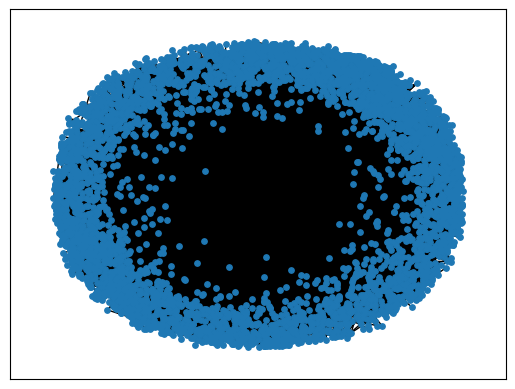

In [9]:
plt.figure()
nx.draw_networkx(T_mar2019, with_labels=False, node_size = 15)
plt.show()

### Novembro 2019

In [10]:
#craetes a correlation matrix
cor_matrix_nov2019 = df_ny_nov2019.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_nov2019.head()

MMM      EGHT       AOS      ATEN       AIR       ABB       ABT  \
MMM   1.000000 -0.019187  0.364437  0.027520  0.389187  0.693517 -0.075176   
EGHT -0.019187  1.000000  0.166785 -0.149679 -0.194984  0.161858  0.208678   
AOS   0.364437  0.166785  1.000000  0.121439  0.481202  0.392720  0.151941   
ATEN  0.027520 -0.149679  0.121439  1.000000  0.203371  0.140035  0.566993   
AIR   0.389187 -0.194984  0.481202  0.203371  1.000000  0.150241  0.152839   

          ABBV       ANF       AGD  ...        ZG      ZION     ZIONL  \
MMM   0.457193  0.661543  0.649846  ... -0.129757  0.654575 -0.084587   
EGHT  0.358422 -0.025402  0.339064  ...  0.579282 -0.136575 -0.285081   
AOS   0.173030  0.556923  0.269282  ...  0.130832  0.403362 -0.118364   
ATEN  0.153723  0.309932  0.088704  ... -0.289739  0.101914  0.218352   
AIR  -0.025867  0.496034 -0.009930  ... -0.370597  0.231680  0.336878   

         ZIONO     ZIONP      ZKIN        ZS      ZUMZ      ZYNE      ZYXI  
MMM  -0.327279 -0.163749 -0.136464  0.290899  0.423630 -0.301289  0.209477  
EGHT  0.143713  0.339586  0.066096  0.227801 -0.261452 -0.223623  0.328708  
AOS  -0.112712  0.154923 -0.098755  0.195597  0.338787 -0.150993  0.263245  
ATEN  0.042502 -0.130067 -0.235405  0.209905  0.231931  0.345121  0.434035  
AIR  -0.314154 -0.330968 -0.471499  0.252544  0.559188  0.023489  0.184755  

[5 rows x 4756 columns]

In [11]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_nov2019 = cor_matrix_nov2019.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix_nov2019 = np.asmatrix(cor_matrix_nov2019)

In [12]:
#Crates graph using the data of the correlation matrix
G_nov2019 = nx.from_numpy_matrix(cor_matrix_nov2019)

#relabels the nodes to match the  stocks names
G_nov2019 = nx.relabel_nodes(G_nov2019,lambda x: stocks_nov2019[x])

#shows the edges with their corresponding weights
#G_nov2019.edges(data=True)

In [13]:
T_nov2019 = minimum_spanning_tree(G_nov2019, ignore_nan=True)

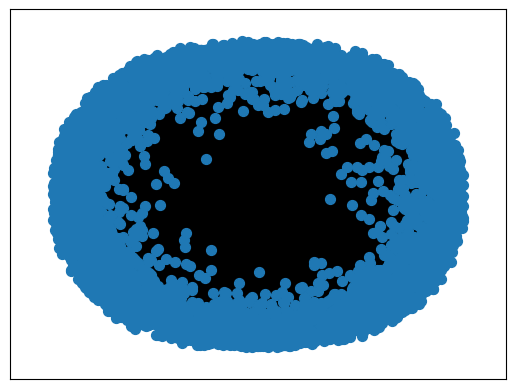

In [14]:
plt.figure()
nx.draw_networkx(T_nov2019, with_labels=False, node_size = 50)
plt.show()

### Março 2020

In [15]:
#craetes a correlation matrix
cor_matrix_mar2020 = df_ny_mar2020.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_mar2020.head()

MMM      EGHT       AOS      ATEN       AIR       ABB       ABT  \
MMM   1.000000  0.664157  0.738697  0.417828  0.342786  0.792504  0.897022   
EGHT  0.664157  1.000000  0.444754  0.469548  0.366845  0.681853  0.455799   
AOS   0.738697  0.444754  1.000000  0.310945  0.207271  0.532446  0.807740   
ATEN  0.417828  0.469548  0.310945  1.000000  0.670670  0.530494  0.200383   
AIR   0.342786  0.366845  0.207271  0.670670  1.000000  0.622775  0.226035   

          ABBV       ANF       AGD  ...        ZG      ZION     ZIONL  \
MMM   0.787904  0.603310  0.547551  ...  0.469663  0.816762 -0.105991   
EGHT  0.498693  0.649383  0.547399  ...  0.594408  0.601262  0.280693   
AOS   0.687829  0.386701  0.480193  ...  0.490707  0.699546  0.176972   
ATEN  0.484960  0.565220  0.477874  ...  0.651637  0.507396  0.260823   
AIR   0.505765  0.654463  0.764858  ...  0.731163  0.405812  0.083083   

         ZIONO     ZIONP      ZKIN        ZS      ZUMZ      ZYNE      ZYXI  
MMM   0.493713  0.077472  0.182720  0.508285  0.563610  0.369882  0.560494  
EGHT  0.601600  0.113494 -0.147011  0.488299  0.712473  0.367591  0.453520  
AOS   0.084377 -0.017567  0.270138  0.416441  0.205813  0.303441  0.628742  
ATEN  0.448719 -0.044752  0.204996  0.453241  0.497682  0.746268  0.481895  
AIR   0.575541  0.516807  0.312591  0.196110  0.472500  0.609350  0.481728  

[5 rows x 4756 columns]

In [16]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_mar2020 = cor_matrix_mar2020.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix_mar2020 = np.asmatrix(cor_matrix_mar2020)

In [17]:
#Crates graph using the data of the correlation matrix
G_mar2020 = nx.from_numpy_matrix(cor_matrix_mar2020)

#relabels the nodes to match the  stocks names
G_mar2020 = nx.relabel_nodes(G_mar2020,lambda x: stocks_mar2020[x])

#shows the edges with their corresponding weights
#G_mar2020.edges(data=True)

In [18]:
T_mar2020 = minimum_spanning_tree(G_mar2020, ignore_nan=True)

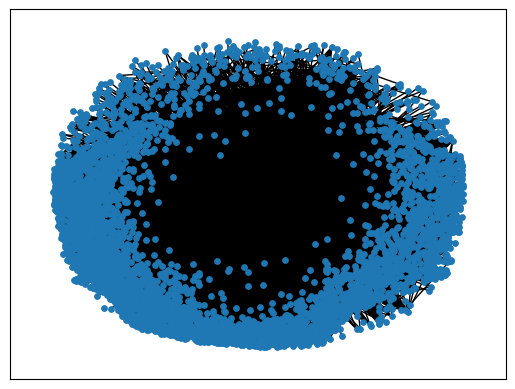

In [19]:
plt.figure()
nx.draw_networkx(T_mar2020, with_labels=False, node_size = 15)
plt.show()

### Dezembro 2021

In [20]:
#craetes a correlation matrix
cor_matrix_dez2021 = df_ny_dez2021.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_dez2021.head()

MMM      EGHT       AOS      ATEN       AIR       ABB       ABT  \
MMM   1.000000  0.033526  0.540999  0.012615  0.040499  0.521051  0.265549   
EGHT  0.033526  1.000000  0.041229  0.336678  0.571404  0.325954  0.195264   
AOS   0.540999  0.041229  1.000000  0.541560  0.402148  0.716855  0.487088   
ATEN  0.012615  0.336678  0.541560  1.000000  0.627347  0.355492  0.269549   
AIR   0.040499  0.571404  0.402148  0.627347  1.000000  0.523681  0.313068   

          ABBV       ANF       AGD  ...        ZG      ZION     ZIONL  \
MMM   0.544384  0.186663  0.262583  ...  0.037549  0.538909  0.089269   
EGHT -0.139104  0.592412  0.567231  ...  0.305398  0.305868  0.324708   
AOS   0.340599  0.194372  0.593710  ...  0.095878  0.572566  0.024952   
ATEN  0.072649  0.548786  0.535773  ...  0.238385  0.358772  0.268613   
AIR  -0.139676  0.699404  0.611985  ...  0.407139  0.568569  0.295521   

         ZIONO     ZIONP      ZKIN        ZS      ZUMZ      ZYNE      ZYXI  
MMM   0.244361  0.099595 -0.208443 -0.507280  0.349791 -0.252590  0.175960  
EGHT -0.018568  0.120872  0.645485  0.326000  0.482614  0.593319  0.296068  
AOS   0.160817  0.246259  0.278146  0.244083  0.421437  0.019093  0.121948  
ATEN -0.264461  0.046636  0.651849  0.658631  0.562159  0.354626  0.312459  
AIR  -0.039525 -0.079624  0.727380  0.393909  0.692117  0.546316  0.396467  

[5 rows x 4756 columns]

In [21]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_dez2021 = cor_matrix_dez2021.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix_dez2021 = np.asmatrix(cor_matrix_dez2021)

In [22]:
#Crates graph using the data of the correlation matrix
G_dez2021 = nx.from_numpy_matrix(cor_matrix_dez2021)

#relabels the nodes to match the  stocks names
G_dez2021 = nx.relabel_nodes(G_dez2021,lambda x: stocks_dez2021[x])

#shows the edges with their corresponding weights
#G_dez2021.edges(data=True)

In [23]:
T_dez2021 = minimum_spanning_tree(G_dez2021, ignore_nan=True)

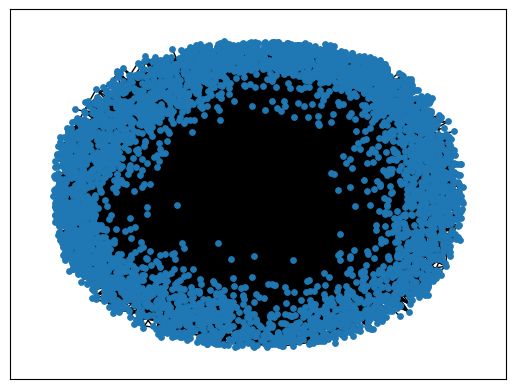

In [29]:
plt.figure()
nx.draw_networkx(T_dez2021, with_labels=False, node_size = 15)
plt.show()

### Setembro 2022

In [24]:
#craetes a correlation matrix
cor_matrix_set2022 = df_ny_set2022.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_set2022.head()

MMM      EGHT       AOS      ATEN       AIR       ABB       ABT  \
MMM   1.000000  0.056721  0.488205  0.375458  0.354859  0.492561  0.567058   
EGHT  0.056721  1.000000  0.286413  0.390195  0.375469  0.611202  0.230554   
AOS   0.488205  0.286413  1.000000  0.170645  0.453439  0.705632  0.418568   
ATEN  0.375458  0.390195  0.170645  1.000000  0.426118  0.539776  0.145738   
AIR   0.354859  0.375469  0.453439  0.426118  1.000000  0.754843  0.287989   

          ABBV       ANF       AGD  ...        ZG      ZION     ZIONL  \
MMM   0.392843  0.538265  0.589942  ...  0.425520  0.353060 -0.300986   
EGHT  0.145700  0.125320  0.021065  ...  0.141707  0.257425 -0.063213   
AOS   0.402352  0.619082  0.481560  ...  0.477859  0.592718 -0.087863   
ATEN  0.068730  0.224645  0.295357  ...  0.108815  0.099918 -0.318263   
AIR   0.025499  0.262671  0.544337  ...  0.362434  0.450253  0.105896   

         ZIONO     ZIONP      ZKIN        ZS      ZUMZ      ZYNE      ZYXI  
MMM   0.015317  0.443522  0.111673  0.442031  0.513174  0.197155  0.485601  
EGHT  0.475666 -0.058403  0.224962  0.573424  0.567318  0.202613  0.165577  
AOS   0.372543 -0.075932  0.269574  0.198317  0.575424  0.275628  0.423612  
ATEN  0.197289  0.192875  0.334408  0.741404  0.390521  0.349380  0.298465  
AIR   0.481781  0.308057  0.551847  0.630389  0.448805  0.240204  0.379123  

[5 rows x 4756 columns]

In [25]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_set2022 = cor_matrix_set2022.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix_set2022 = np.asmatrix(cor_matrix_set2022)

In [26]:
#Crates graph using the data of the correlation matrix
G_set2022 = nx.from_numpy_matrix(cor_matrix_set2022)

#relabels the nodes to match the  stocks names
G_set2022 = nx.relabel_nodes(G_set2022,lambda x: stocks_set2022[x])

#shows the edges with their corresponding weights
#G_set2022.edges(data=True)

In [27]:
T_set2022 = minimum_spanning_tree(G_set2022, ignore_nan=True)

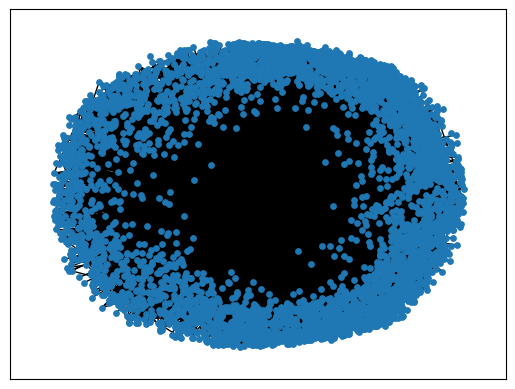

In [28]:
plt.figure()
nx.draw_networkx(T_set2022, with_labels=False, node_size = 15)
plt.show()

No caso da base NASDAQ/NYSE, tivemos vários problemas quanto ao custo computacional dos algoritmos. Ao fim das tentativas obtivemos MSTs em forma de "bola de pêlos", das quais não conseguimos ainda retirar muitas informações.

### Referências Bibliográficas

* [Avaliação comparativa entre medidas de redes
complexas para a classificação de dados](https://repositorio.ufu.br/bitstream/123456789/28507/4/Avalia%C3%A7%C3%A3oComparativaEntre.pdf)
* [Network Science Book - The Bridges of Königsberg](http://networksciencebook.com/chapter/2)
* [Algoritmos em grafos:
árvore de expansão mínima
(minimum spanning tree)](https://paginas.fe.up.pt/~rossetti/rrwiki/lib/exe/fetch.php?media=teaching:1011:cal:07_1.grafos3.pdf)
* Introduction to Econophysics: Correlations and Complexity in Finance. Mantegna & Stanley.